**Project 2**

Ad click prediction by logistic regression and decision tree models

from https://www.kaggle.com/fayomi/advertising

Using logistic regression and decision tree to predict whether or not a user clicked on an advertisement


In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')
#sns.set_style('whitegrid')

In [297]:
data = pd.read_csv('advertising.csv')
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [112]:
cols = ['Male', 'Age', 'City', 'Country', 'Area Income', 'Daily Internet Usage', 'Daily Time Spent on Site', 'Timestamp', 'Ad Topic Line', 'Clicked on Ad']
data = data[cols]
data.head()

,Male,Age,City,Country,Area Income,Daily Internet Usage,Daily Time Spent on Site,Timestamp,Ad Topic Line,Clicked on Ad
0,0,35,Wrightburgh,Tunisia,61833.90,256.09,68.95,2016-03-27 00:53:11,Cloned 5thgeneration orchestration,0
1,1,31,West Jodi,Nauru,68441.85,193.77,80.23,2016-04-04 01:39:02,Monitored national standardization,0
2,0,26,Davidton,San Marino,59785.94,236.50,69.47,2016-03-13 20:35:42,Organic bottom-line service-desk,0
3,1,29,West Terrifurt,Italy,54806.18,245.89,74.15,2016-01-10 02:31:19,Triple-buffered reciprocal time-frame,0
4,0,35,South Manuel,Iceland,73889.99,225.58,68.37,2016-06-03 03:36:18,Robust logistical utilization,0


In [113]:
data.shape

(1000, 10)

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Male                      1000 non-null   int64  
 1   Age                       1000 non-null   int64  
 2   City                      1000 non-null   object 
 3   Country                   1000 non-null   object 
 4   Area Income               1000 non-null   float64
 5   Daily Internet Usage      1000 non-null   float64
 6   Daily Time Spent on Site  1000 non-null   float64
 7   Timestamp                 1000 non-null   object 
 8   Ad Topic Line             1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [115]:
data.describe()

,Male,Age,Area Income,Daily Internet Usage,Daily Time Spent on Site,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.481000,36.009000,55000.000080,180.000100,65.000200,0.50000
std,0.499889,8.785562,13414.634022,43.902339,15.853615,0.50025
min,0.000000,19.000000,13996.500000,104.780000,32.600000,0.00000
25%,0.000000,29.000000,47031.802500,138.830000,51.360000,0.00000
50%,0.000000,35.000000,57012.300000,183.130000,68.215000,0.50000
75%,1.000000,42.000000,65470.635000,218.792500,78.547500,1.00000
max,1.000000,61.000000,79484.800000,269.960000,91.430000,1.00000


**Visualizing Target Variable**

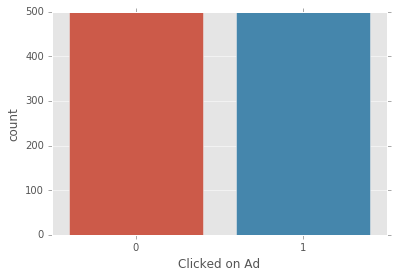

In [116]:
sns.countplot(x=data['Clicked on Ad'])

# we see that the dataset is balanced

Text(0, 0.5, 'Count')

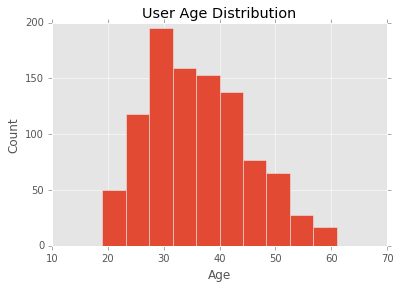

In [117]:
plt.hist(data['Age'])
plt.title('User Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


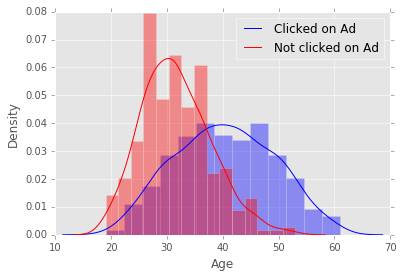

In [118]:
sns.distplot(data['Age'][data['Clicked on Ad'] == 1], color='blue')
sns.distplot(data['Age'][data['Clicked on Ad'] == 0], color='red')
plt.legend(labels= ['Clicked on Ad', 'Not clicked on Ad'])
plt.show()

# majority of people below age ~37 have not clicked on the ad
# majority of people above age ~37 have clicked on the ad

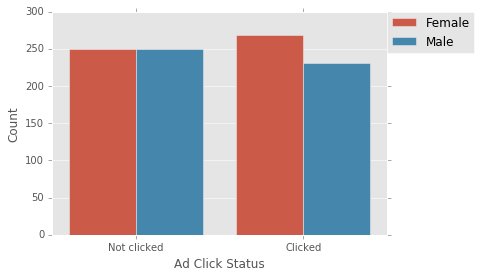

In [119]:
g = sns.countplot(x = 'Clicked on Ad', data=data, hue='Male')
g.set_xlabel('Ad Click Status')
g.set_ylabel('Count')
g.set_xticklabels(['Not clicked', 'Clicked'])
plt.legend(labels= ['Female', 'Male'], bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)

# equal number of males and females have not clicked on the ads
# more females than males have clicked on the ads

In [120]:
gender = data.groupby('Male')
gender['Clicked on Ad'].agg(np.sum)

# 0: females - number of clicks: 269
# 1: males   - number of clicks: 231

Male
0    269
1    231
Name: Clicked on Ad, dtype: int64

In [121]:
clicked = data.groupby('Clicked on Ad')
clicked['Male'].agg(np.sum)

# 0: not clicked - number of males: 250
# 1: clicked     - number of males: 231

Clicked on Ad
0    250
1    231
Name: Male, dtype: int64

In [274]:
# or
gender['Clicked on Ad'].value_counts()

#len(gender[gender['Clicked on Ad'] == 1])
# why is it not working?

Male  Clicked on Ad
0     1                269
      0                250
1     0                250
      1                231
Name: Clicked on Ad, dtype: int64

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


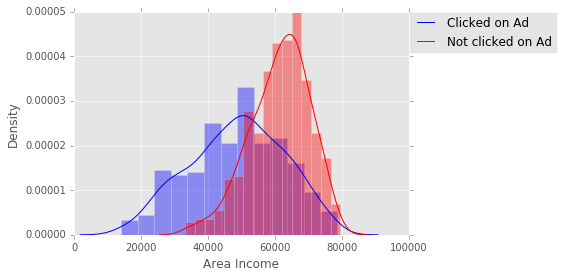

In [123]:
sns.distplot(data['Area Income'][data['Clicked on Ad'] == 1], color='blue')
sns.distplot(data['Area Income'][data['Clicked on Ad'] == 0], color='red')
plt.legend(labels= ['Clicked on Ad', 'Not clicked on Ad'], bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


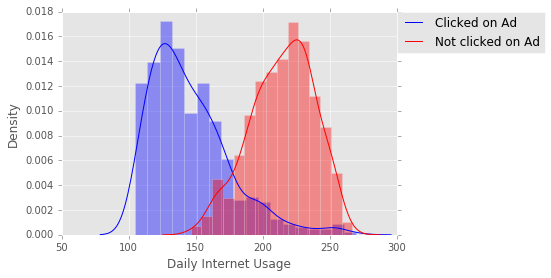

In [124]:
sns.distplot(data['Daily Internet Usage'][data['Clicked on Ad'] == 1], color='blue')
sns.distplot(data['Daily Internet Usage'][data['Clicked on Ad'] == 0], color='red')
plt.legend(labels= ['Clicked on Ad', 'Not clicked on Ad'], bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


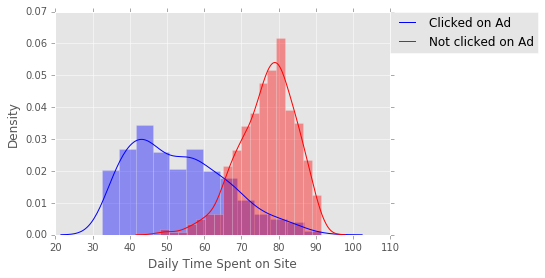

In [125]:
sns.distplot(data['Daily Time Spent on Site'][data['Clicked on Ad'] == 1], color='blue')
sns.distplot(data['Daily Time Spent on Site'][data['Clicked on Ad'] == 0], color='red')
plt.legend(labels= ['Clicked on Ad', 'Not clicked on Ad'], bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.show()

In [329]:
#sns.jointplot(x='Daily Time Spent on Site', y='Age', data=data, kind='kde')

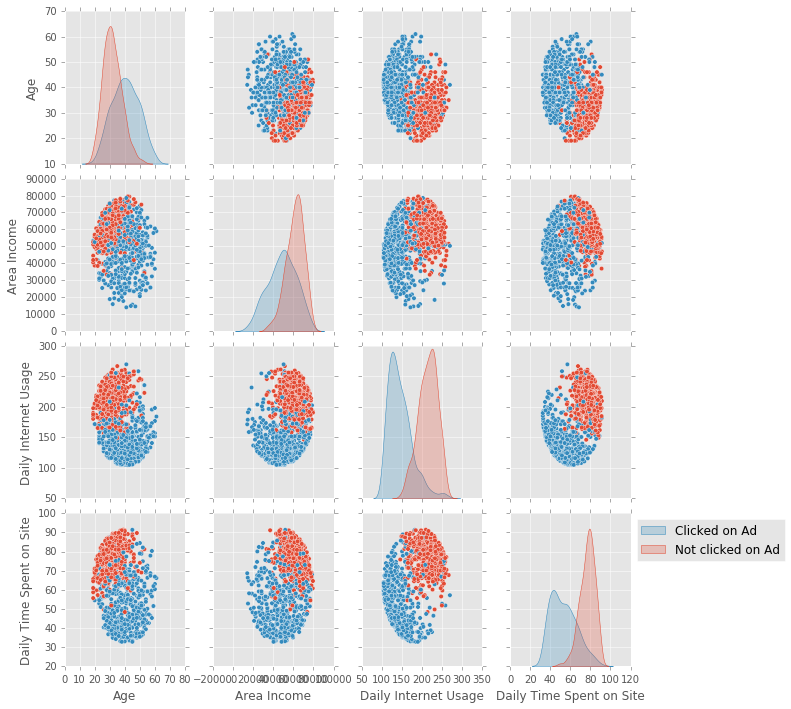

In [317]:
g = sns.pairplot(data, hue='Clicked on Ad', vars= ['Age', 'Area Income', 'Daily Internet Usage', 'Daily Time Spent on Site'])
g.fig.set_size_inches(10,10)
g._legend.remove()
plt.legend(labels= ['Clicked on Ad', 'Not clicked on Ad'], bbox_to_anchor=(1, 1), loc=2)


**Extracting Date Components**

In [127]:
# converting the Timestamp column to DateTime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

data['Month'] = data['Timestamp'].dt.month
data['Day'] = data['Timestamp'].dt.day
data['Hour'] = data['Timestamp'].dt.hour
data['Weekday'] = data['Timestamp'].dt.dayofweek

In [128]:
data = data.drop('Timestamp', axis=1)
data.head()

,Male,Age,City,Country,Area Income,Daily Internet Usage,Daily Time Spent on Site,Ad Topic Line,Clicked on Ad,Month,Day,Hour,Weekday
0,0,35,Wrightburgh,Tunisia,61833.90,256.09,68.95,Cloned 5thgeneration orchestration,0,3,27,0,6
1,1,31,West Jodi,Nauru,68441.85,193.77,80.23,Monitored national standardization,0,4,4,1,0
2,0,26,Davidton,San Marino,59785.94,236.50,69.47,Organic bottom-line service-desk,0,3,13,20,6
3,1,29,West Terrifurt,Italy,54806.18,245.89,74.15,Triple-buffered reciprocal time-frame,0,1,10,2,6
4,0,35,South Manuel,Iceland,73889.99,225.58,68.37,Robust logistical utilization,0,6,3,3,4


**Correlation Matrix**

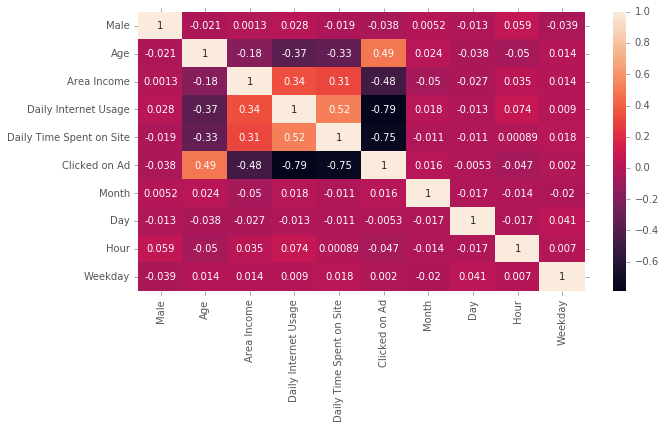

In [129]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(), annot=True)

In [130]:
# dropping columns which are not strognly correlated with the target and other features
data.drop(['Month', 'Day', 'Hour', 'Weekday'], axis=1, inplace=True)
data.head()

,Male,Age,City,Country,Area Income,Daily Internet Usage,Daily Time Spent on Site,Ad Topic Line,Clicked on Ad
0,0,35,Wrightburgh,Tunisia,61833.90,256.09,68.95,Cloned 5thgeneration orchestration,0
1,1,31,West Jodi,Nauru,68441.85,193.77,80.23,Monitored national standardization,0
2,0,26,Davidton,San Marino,59785.94,236.50,69.47,Organic bottom-line service-desk,0
3,1,29,West Terrifurt,Italy,54806.18,245.89,74.15,Triple-buffered reciprocal time-frame,0
4,0,35,South Manuel,Iceland,73889.99,225.58,68.37,Robust logistical utilization,0


**Prepare the Data for the Model**

In [147]:
# separating featues from the label
# do the categorical variables have to be converted to dummy variables?

X = data.drop(['Clicked on Ad', 'City', 'Country', 'Ad Topic Line'], axis=1)
y = data['Clicked on Ad']

features.shape, label.shape

((1000, 8), (1000,))

In [173]:
# split the data into train and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((700, 5), (700,), (300, 5), (300,))

**Implement Logistic Regression**

In [185]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, precision_score, recall_score, confusion_matrix, plot_confusion_matrix

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Accuracy:', logreg.score(X_test, y_test))

Accuracy: 0.97


In [186]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       146
           1       0.98      0.96      0.97       154

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



**Confusion Matrix**

In [194]:
confusion_matrix(y_test, y_pred)

array([[143,   3],
       [  6, 148]])

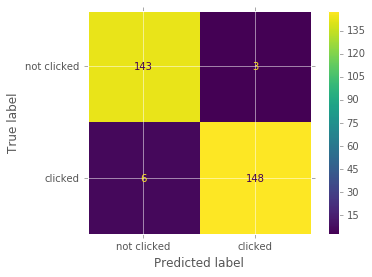

In [288]:
plot_confusion_matrix(logreg, X_test, y_test, display_labels=['not clicked', 'clicked'], values_format = '')

True negatives: 143,
False positives: 3,
False negatives: 6,
True positives: 148

In [196]:
# recall 
148/154

0.961038961038961

In [318]:
# getting false positives
#data[(y_test!=y_pred) & (y_pred==1)]
# ?

**Decision Tree**

In [320]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=42)
clf = tree.DecisionTreeClassifier(criterion='entropy', random_state=42)

clf.fit(X_train1, y_train1)
y_pred1 = clf.predict(X_test1) # y_pred for decision tree
#y_pred2 = clf.predict_proba(X_test1)

accuracy_score(y_test1, y_pred1)

0.9233333333333333

In [248]:
accuracy = float(np.sum(y_pred1==y_test)/y_test.shape[0])
accuracy

0.9233333333333333

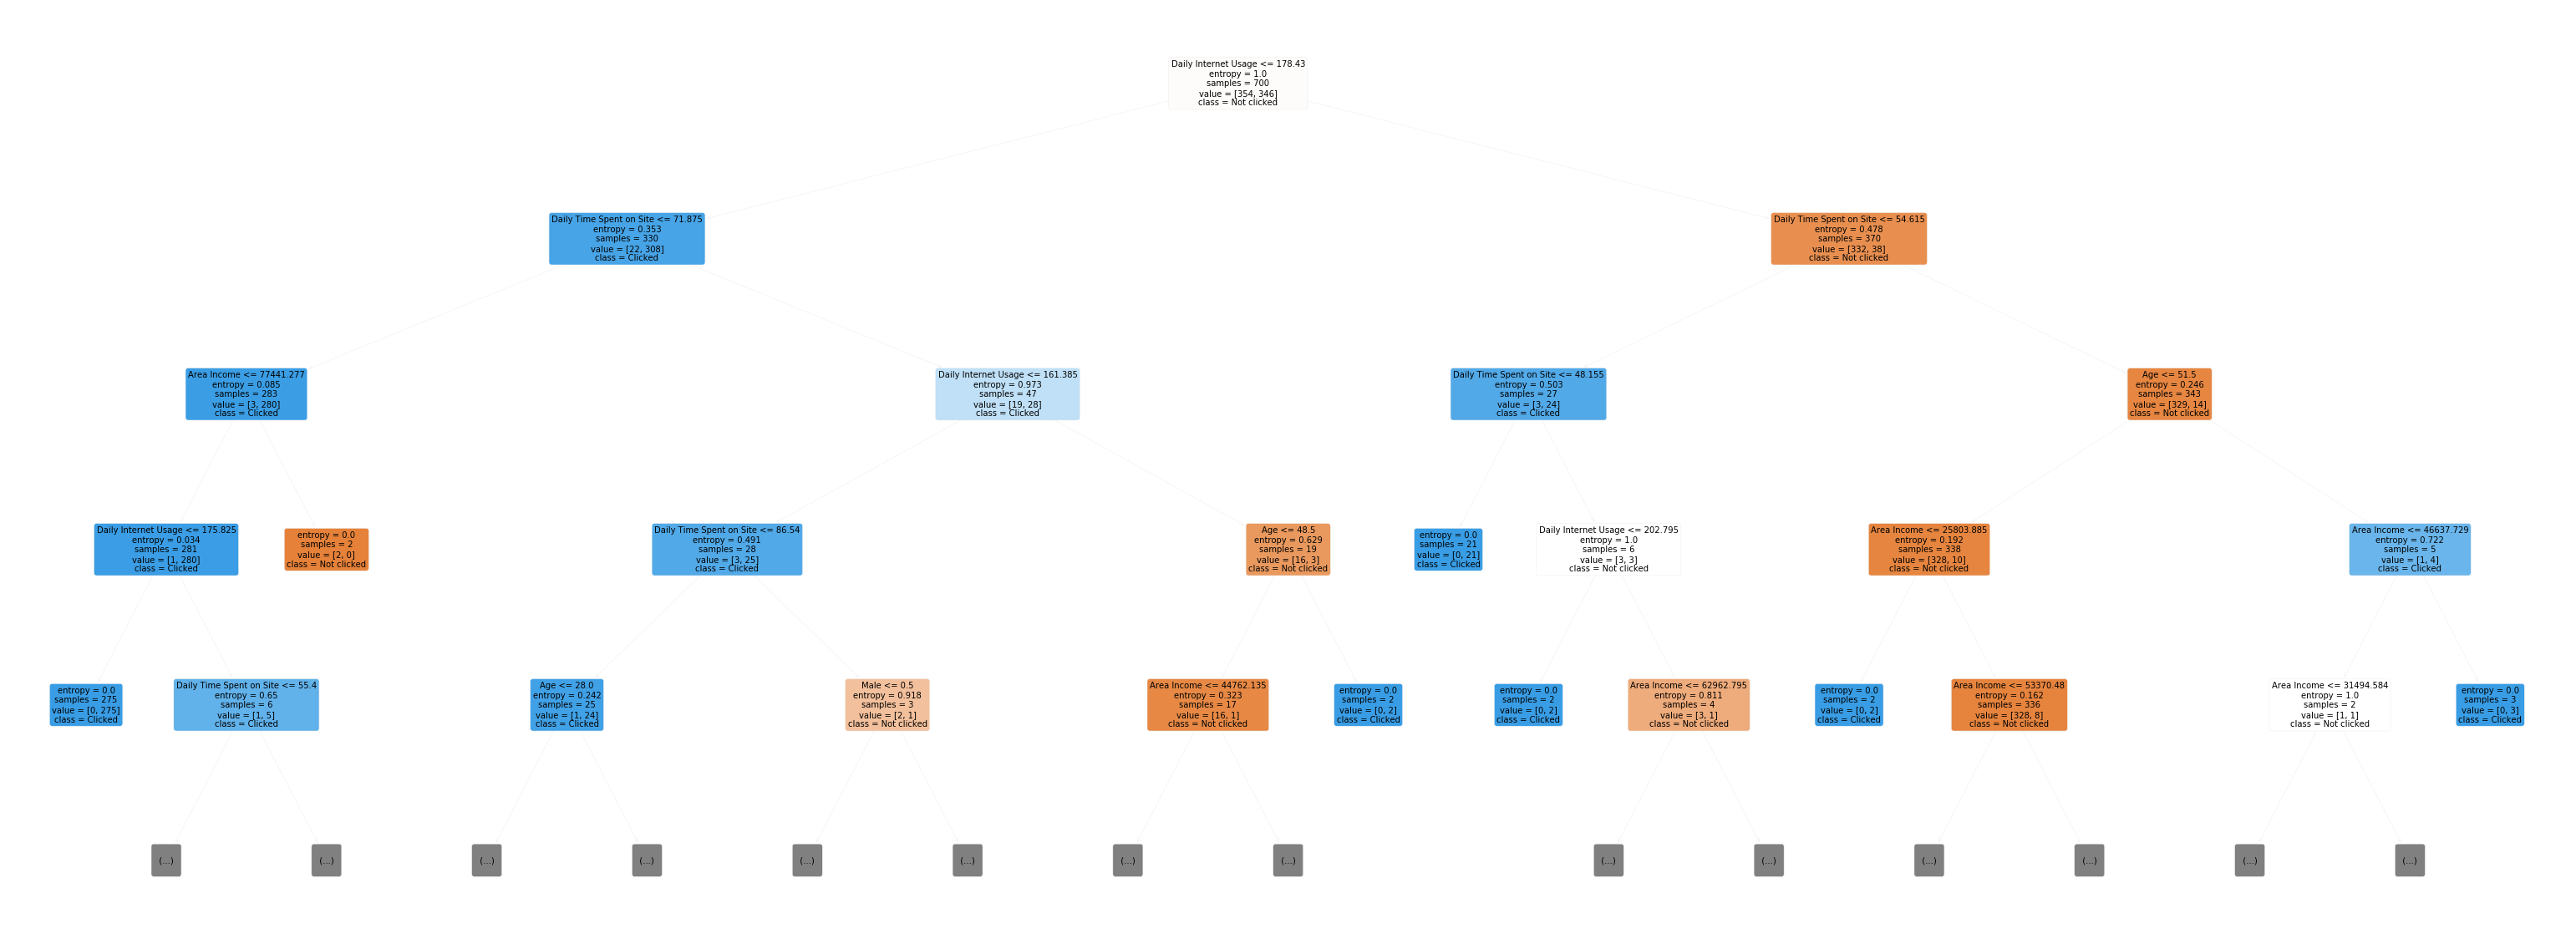

In [295]:
# plotting the tree

fn = ['Male', 'Age', 'Area Income', 'Daily Internet Usage', 'Daily Time Spent on Site']
cn = ['Not clicked', 'Clicked']

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(50, 20))
#plt.figure(figsize=(12,12))
tree.plot_tree(decision_tree=clf, feature_names=fn, class_names=cn, max_depth=4, fontsize=10, rounded=True, filled=True)
plt.show()
fig.savefig('Ad_click_decision_tree.png')

In [254]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.94 (+/- 0.02)


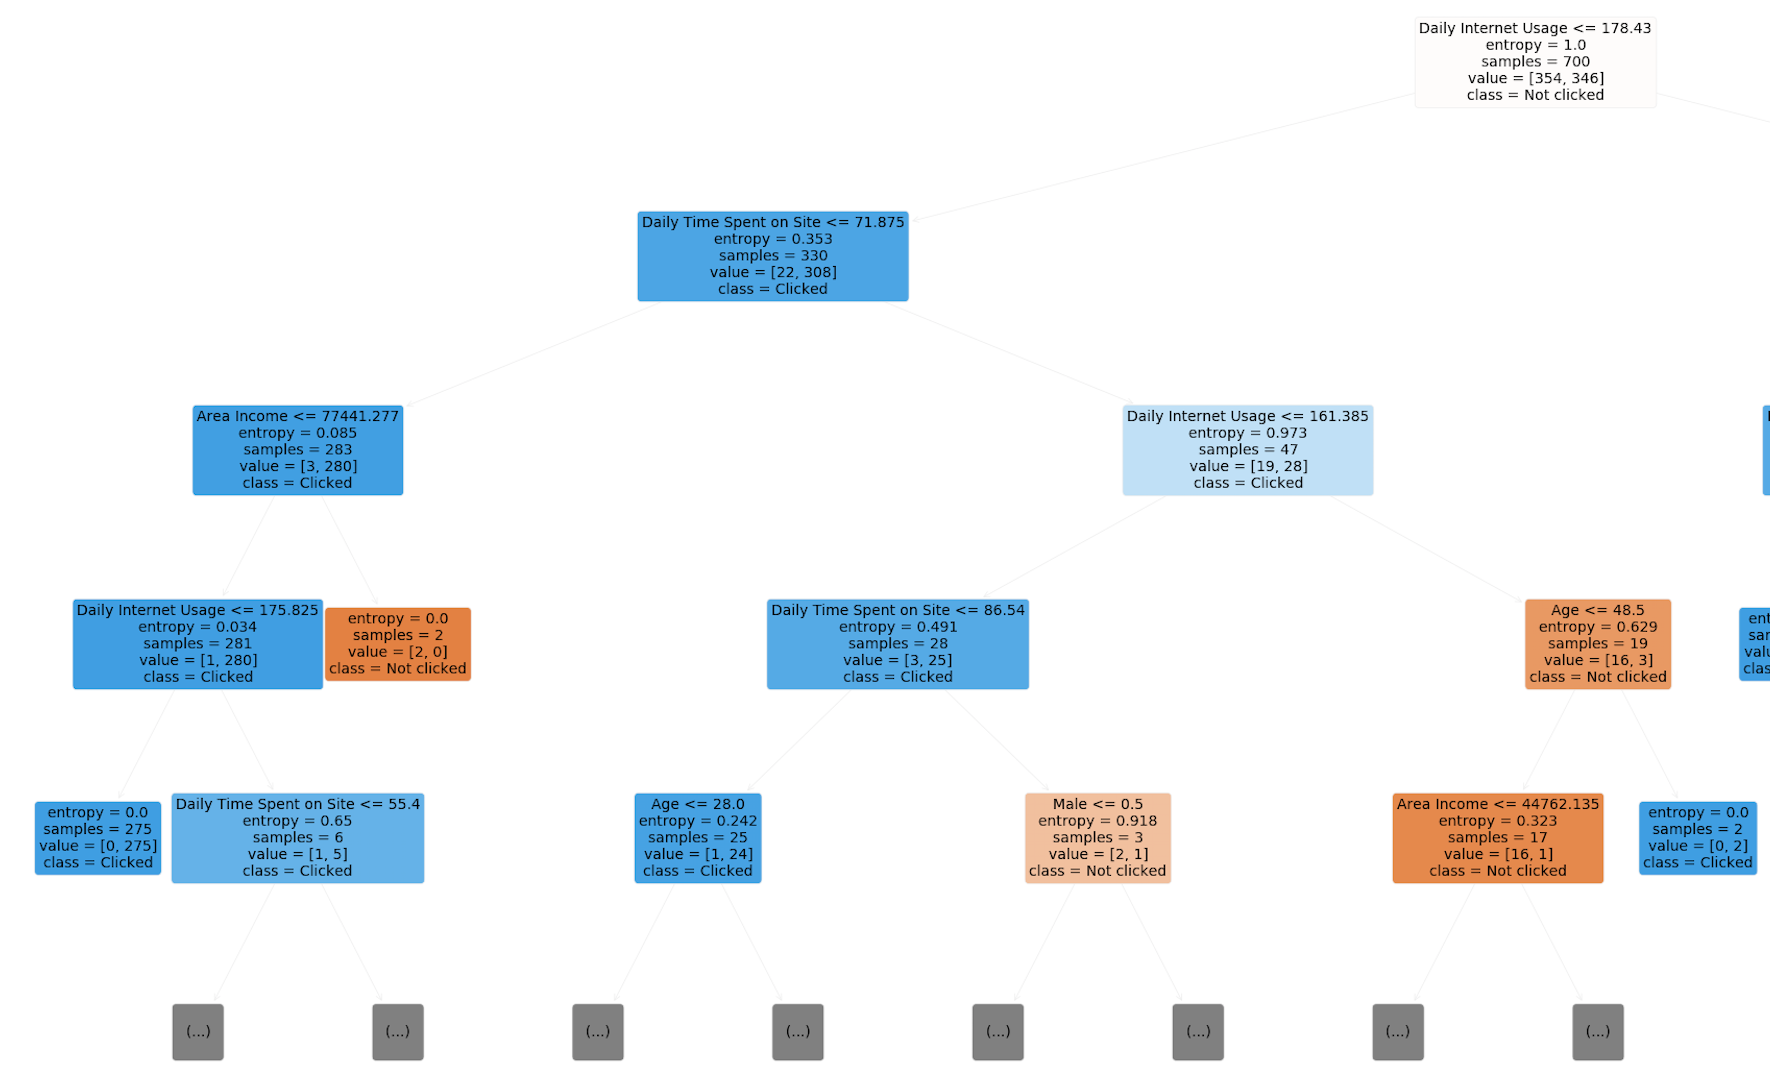

In [328]:
from IPython.display import display, Image
display(Image(filename='decision_tree1.png'))